<a href="https://colab.research.google.com/github/narchitect/NUS_Data-Science/blob/main/Exercise_4_2_Pandas_Stats_and_Viz_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Construction, Architecture and Engineering

### Section 4 - Operations - Pandas Statistics and Visualization

### Exercise Set 4.2 - Pandas Stats and Viz II

This set of exercises is related to the second half of Section 4 videos. Using the same data (ASBRAE Thermal Comfort Database II) and packages (Pandas) as in the videos, we will learn how to find specific values in different scenarios.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is Chun Fu, a Ph.D. student at NUS and a teaching assistant of this course. 

#### Setup the environment

Let's set up the environment and read the data first:

In [1]:
# Import packages
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set path for data source
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/4 - Operations - Statistics and Visualization/")

Mounted at /content/gdrive


In [3]:
# Load thermal comfort database
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [8]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

## Boxplot Example in Seaborn

Before we get into the exercises, let's look at an example of how we can use boxplots to compare distributions between different groups. In the figure below, we have created a visualization that shows the **Air temperature (C)** has significantly different distributions under different **Thermal sensation**.

For example, **Air temperature (C)** with the lowest **ThermalSensation_rounded** value (-3.0) has the distribution of lower values (seeing the boxplot body that covers 50% of the data).

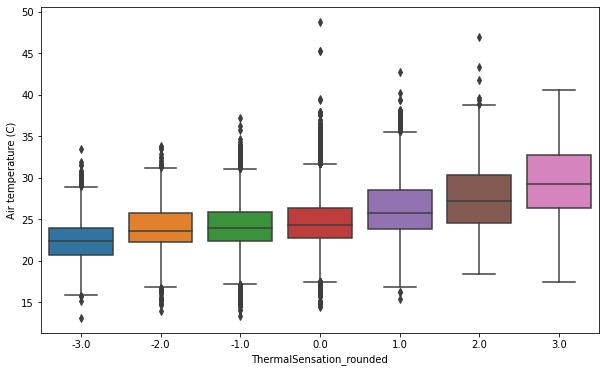

In [4]:
# Boxplot for Air temperature (C) under different Thermal sensation
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)

## Exercise 04.2.1 -- Which country has the lowest median relative humidity?

After the example shown above, you should be more familiar with how to use boxplot in Seaborn package! 

Now, imagine you are an environmental researcher who mainly studies **humidity conditions** of our surrounding environments, especially focusing on where the **lowest** relative humidity happens.

So, in our first exercise, let's begin with considering only one variable (or column) - **Country**. In terms of **median**, find the country with the lowest **Relative humidity (%)**, according to the dataset (for example, **Singapore** could be one of possible answers).

 You are encouraged to draw boxplots of **Relative humidity (%)** for each of the different **Country**, just like the example we demonstrated.

**Note**: All measurements in `ASHRAE Thermal Comfort Database II` were collected from field experiments research projects, including indoor and outdoor environments, so they might not represent the local climate or general indoor condition.

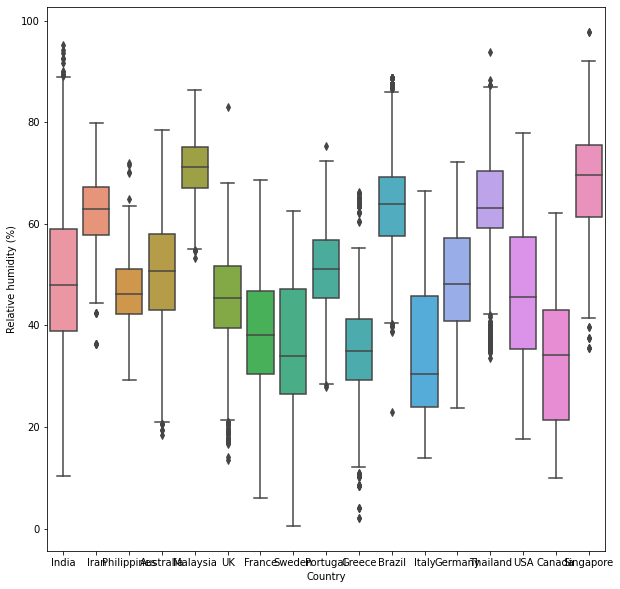

In [7]:
# Try to use the seaborn example from above. If the x-axis labels are too hard to read, try to adjust the parameters in set_size_inches() or switch X and Y axis
# YOUR CODE HERE

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="Country", y="Relative humidity (%)", data=ieq_data)

## Exercise 04.2.2 - Which country and season has the lowest median relative humidity?

In 4.2.1, we got the lowest median relative humidity among different countries. However, the distribution of humidity is also strongly affected by different seasons. Therefore, in this exercise, please consider both **Country** and **Season** at the same time to find the lowest median **Relative humidity (%)**.

Find the country and season with the lowest **median** **Relative humidity (%)** (for example, **Singapore-Summer** could be one of possible answers).

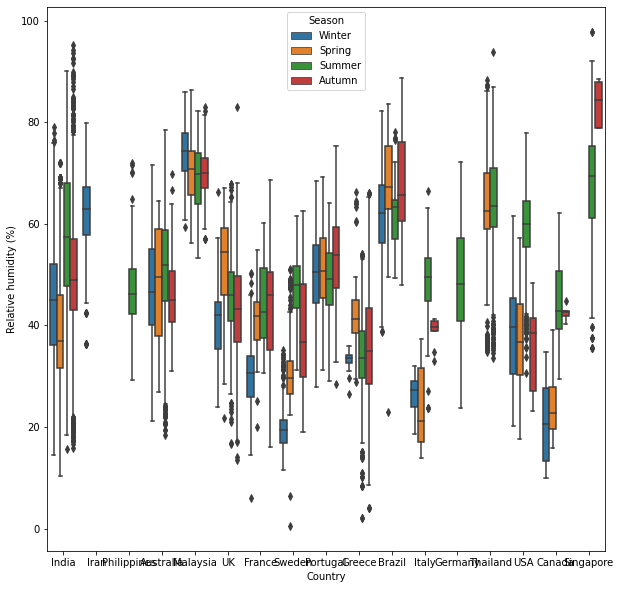

In [10]:
# If the x-axis labels are too hard to read, try to adjust the parameters in set_size_inches() or switch X and Y axis
# YOUR CODE HERE
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="Country", y="Relative humidity (%)", hue="Season", data=ieq_data)

## Exercise 04.2.3 - Which country, season, and building type, has the lowest median relative humidity? - Advanced

Based on the problems above, we can get the minimum relative humidity by taking into account both the **Country** and the **Season**. However, **Building type** is also an important factor influencing the indoor environment, and we should consider this as well. In addition, some subsets in the `ASHRAE Thermal Comfort Database II` have rows with incomplete data that might not give a reliable result, so they should be removed.

So, in this exercise, we want to (1) consider three conditions at the same time: **Country**, **Season** and **Building type**, and (2) **remove the subset with less than 100 rows** (e.g., the subset Sweden-Winter-Classroom with only 54 data rows should be removed).

Find the **Country**, **Season**, and **Building type** with the lowest `median` **Relative humidity (%)**

Please provide the answer in the following format: "country-season-building type", with the first letter capitalized, for example, **Singapore-Summer-Office**

In [112]:
# Create a dataframe of counts by using groupby(by=['var1','var2','var3']), and put list of variables as parameter in function
# YOUR CODE HERE
listOfVariable = ['Country', 'Season', 'Building type']

grouped_df = ieq_data.groupby(by = listOfVariable).agg(['count', 'mean'])
grouped_df_RH = grouped_df['Relative humidity (%)']

filtered_df_RH = grouped_df_RH[grouped_df_RH['count'] >= 100]

filtered_df_RH.head()

count       mean
Country   Season Building type                  
Australia Autumn Office           234  47.427778
          Summer Office          4998  51.330112
                 Senior center    206  54.158738
          Winter Office          1199  47.832527
                 Senior center    214  44.157944

In [113]:
# Create a dataframe of medians by using groupby(by=listOfVariable), where listOfVariable is a list of variable names
# YOUR CODE HERE
filtered_df_RH_mean = filtered_df_RH['mean']


In [115]:
# Use dataframe of counts as filter (keep subsets with more or equal than 100 data rows) and find the lowest value
# YOUR CODE HERE
filtered_df_RH_mean.idxmin()

('Canada', 'Winter', 'Others')

### **Please note that you will need to use the resultant output from Exercise 04.2.3 for the Quiz 4.2.**
**(The answer should follow the format:"country-season-building type", with the first letter capitalized, for example, Singapore-Summer-Office)**

In [116]:
answer = "Canada-Winter-Others"